# Model Evaluation and Fine Tuning: Classification Metrices

Rafiq Islam  
2024-10-17

## Introduction

In any classification problem, the goal is to build a model that
accurately predicts labels or classes from input data. Once the model is
built, it is important to evaluate its performance using a variety of
metrics. Some of the most commonly used metrics are the confusion
matrix, accuracy, precision, recall, F1 score, and ROC-AUC curve. This
post will explain each metric and show how to compute them using real
data in Python.

### Confusion Matrix

A confusion matrix is a tabular summary of the performance of a
classification algorithm. It shows the number of correct and incorrect
predictions broken down by each class.

For a binary classification, the confusion matrix looks like this:

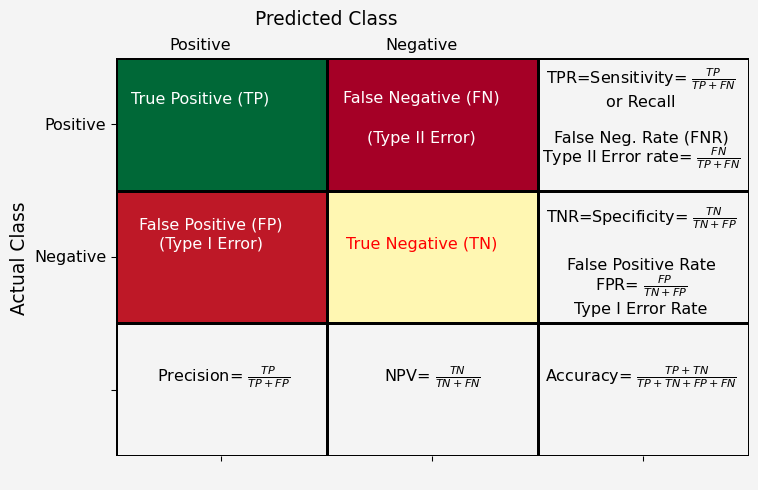

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrix():
    
    matrix_data = np.array([[100, 5], [10, 50]])

    
    extended_matrix = np.zeros((3, 3))  
    extended_matrix[:2, :2] = matrix_data  

    mask = np.zeros_like(extended_matrix, dtype=bool)
    mask[2,:] = True
    mask[:,2] = True

    # Create a plot
    fig, ax = plt.subplots(figsize=(8, 5.2))

    fig.patch.set_facecolor('#f4f4f4') 
    ax.set_facecolor('#f4f4f4')

    sns.heatmap(extended_matrix, mask=mask,annot=False, cmap="RdYlGn", cbar=False, ax=ax, linewidths=2, linecolor='black')

    # Add the original confusion matrix values (True Positive, False Negative, etc.)
    ax.text(0.4, 0.3, 'True Positive (TP)', ha='center', va='center', fontsize=12, color="white")
    ax.text(1.45, 0.3, 'False Negative (FN)', ha='center', va='center', fontsize=12, color="white")
    ax.text(1.45, 0.60, '(Type II Error)', ha='center', va='center', fontsize=12, color="white")
    ax.text(0.45, 1.25, 'False Positive (FP)', ha='center', va='center', fontsize=12, color="white")
    ax.text(0.45, 1.40, '(Type I Error)', ha='center', va='center', fontsize=12, color="white")
    ax.text(1.45, 1.4, 'True Negative (TN)', ha='center', va='center', fontsize=12, color="red")
    ax.text(0.4, -0.1, 'Positive', ha='center', va='center', fontsize=12)
    ax.text(1.45, -0.1, 'Negative', ha='center', va='center', fontsize=12)
    ax.text(1, -0.3, 'Predicted Class', ha='center', va='center', fontsize=14)

    # Add Precision and NPV in the bottom row of the confusion matrix
    ax.text(0.17, 0.2, r'Precision= $\frac{TP}{TP + FP}$', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(0.5, 0.2, r'NPV= $\frac{TN}{TN + FN}$', ha='center', va='center', transform=ax.transAxes, fontsize=12)

    # Add Sensitivity and Specificity in the right column of the confusion matrix
    ax.text(0.83, .95, r'TPR=Sensitivity= $\frac{TP}{TP + FN}$', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(0.83, .89, 'or Recall', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(0.83, .8, 'False Neg. Rate (FNR)', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(0.83, .75, r'Type II Error rate= $\frac{FN}{TP + FN}$', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(0.83, .6, r'TNR=Specificity= $\frac{TN}{TN + FP}$', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(0.83, .48, 'False Positive Rate', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(0.83, .43, r'FPR= $\frac{FP}{TN + FP}$', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(0.83, .37, 'Type I Error Rate', ha='center', va='center', transform=ax.transAxes, fontsize=12)

    # Add Accuracy in the bottom-right corner of the extended grid
    ax.text(0.83, 0.2, r'Accuracy= $\frac{TP + TN}{TP+TN+FP+FN}$', ha='center', va='center', transform=ax.transAxes, fontsize=12)

    # Titles and labels
    ax.set_ylabel('Actual Class', fontsize=14)
    

    # Set tick labels for actual and predicted
    ax.xaxis.set_ticklabels([' ', ' ', ''], fontsize=12)
    ax.yaxis.set_ticklabels(['Positive', 'Negative', ''], fontsize=12, rotation=0)

    plt.tight_layout()
    plt.savefig('conf.png')
    plt.show()

# Generate the confusion matrix plot
plot_confusion_matrix()

-   **True Positive (TP)**: The model correctly predicted the positive
    class.
-   **False Positive (FP)**: The model incorrectly predicted the
    positive class (also known as a Type I error).
-   **True Negative (TN)**: The model correctly predicted the negative
    class.
-   **False Negative (FN)**: The model incorrectly predicted the
    negative class (also known as a Type II error).

### Accuracy

Accuracy is the ratio of correctly predicted observations to the total
observations.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

It is one of the most intuitive metrics, but it can be misleading if the
classes are imbalanced.

### Precision (Positive Predictive Value)

Precision measures the proportion of positive predictions that are
actually correct.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

It is useful when the cost of a false positive is high, such as in fraud
detection.

### Recall (Sensitivity or True Positive Rate)

Recall measures the proportion of actual positives that are correctly
predicted.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

It is important in cases where missing a positive is more costly, like
in medical diagnoses.

### F1 Score

The F1 score is the harmonic mean of precision and recall, giving a
balanced measure when both metrics are important.

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

### ROC-AUC Curve (Receiver Operating Characteristic – Area Under the Curve)

The ROC-AUC curve helps visualize the performance of a classification
model by plotting the true positive rate (recall) against the false
positive rate (1 - specificity) at various threshold settings. The AUC
(Area Under the Curve) gives a single number that summarizes the
performance. A model with an AUC of 1 is perfect, while a model with an
AUC of 0.5 is as good as random guessing.

### Summary of the Metrices

| Metric | Formula |
|----------------------------------|--------------------------------------|
| Precision: | $\frac{TP}{TP+FP}$ |
| Sensitivity or Recall or True Positive Rate (TPR): | $\frac{TP}{TP+FN}$ |
| Type II Error Rate or False Negative Rate (FNR): | $\frac{FN}{FN+TP}$ |
| Sepecificity or Selectivity or True Negative Rate (TNR): | $\frac{TN}{TN+FP}$ |
| Type I Error Rate or False Positive Rate (FPR): | $\frac{FP}{FP+TN}$ |
| Total Error Rate: | $\frac{FP+FN}{TN+TP+FN+FP}$ |
| Accuracy: | $\frac{TP+TN}{TN+TP+FN+FP}$ |

------------------------------------------------------------------------

## Example in Python

Let’s use a real dataset and compute these metrics using Python. In
python the actual confusion matrix looks like this  
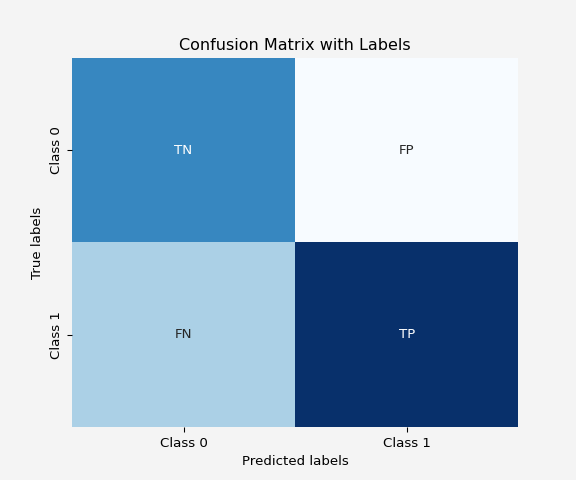

We’ll use the `breast cancer` dataset from `sklearn`, which is a binary
classification problem where the task is to predict whether a tumor is
malignant or benign.

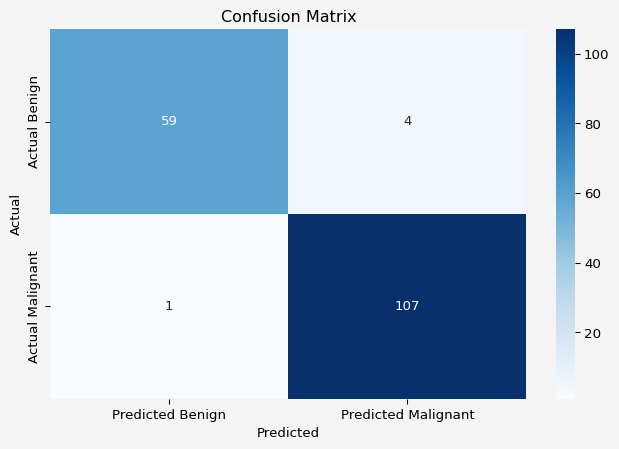

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Benign', 'Predicted Malignant'], yticklabels=['Actual Benign', 'Actual Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.gca().set_facecolor('#f4f4f4')
plt.show()

Next, Compute Accuracy, Precision, Recall, F1 Score, ROC-AUC

In [3]:
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]
tp = cm[1,1]
accuracy1 = np.round(accuracy_score(y_test, y_pred),4)
accuracy2 = np.round(((tp+tn)/(tp+tn+fp+fn)),4)

precision1 = np.round(precision_score(y_test, y_pred),4)
precision2 = np.round(((tp)/(tp+fp)),4)

recall1 = np.round(recall_score(y_test, y_pred),4)
recall2 = np.round(((tp)/(tp+fn)),4)

f1_1 = np.round(f1_score(y_test, y_pred),4) 
f1_2 = np.round((2*precision2*recall2)/(precision2+recall2),4)

roc_auc = roc_auc_score(y_test, y_pred_proba)

print('Accuracy Using Library = {}, and Accuracy Using Formula = {}'.format(accuracy1,accuracy2))
print('Precision Using Library = {}, and Precision Using Formula = {}'.format(precision1,precision2))
print('Recall Using Library = {}, and Recall Using Formula = {}'.format(recall1,recall2))
print('F1 Score Using Library = {}, and F1 Score Using Formula = {}'.format(f1_1,f1_2))
print(f'ROC-AUC score={roc_auc:.4f}')

Accuracy Using Library = 0.9708, and Accuracy Using Formula = 0.9708
Precision Using Library = 0.964, and Precision Using Formula = 0.964
Recall Using Library = 0.9907, and Recall Using Formula = 0.9907
F1 Score Using Library = 0.9772, and F1 Score Using Formula = 0.9772
ROC-AUC score=0.9968

Plot ROC curve. ROC curve is found from plotting *True Positive Rate
(TPRs)* against *False Positive Rate (FPRs)* for different cutoffs of
probability values. To plot the ROC curve using the built-in function
from `sklearn` we do the following:

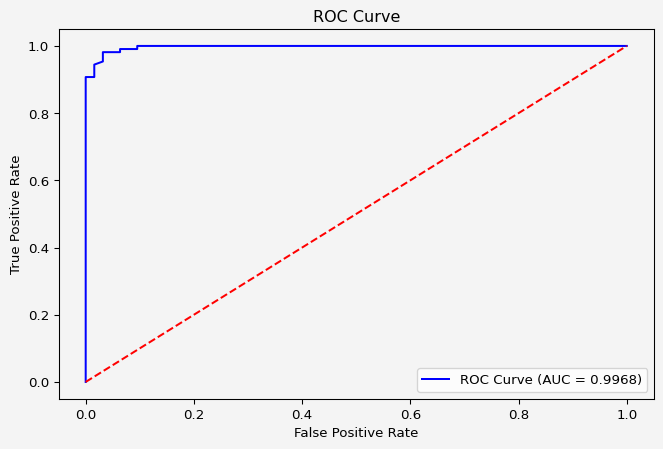

In [4]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.gca().set_facecolor('#f4f4f4')
plt.show()

To build our own

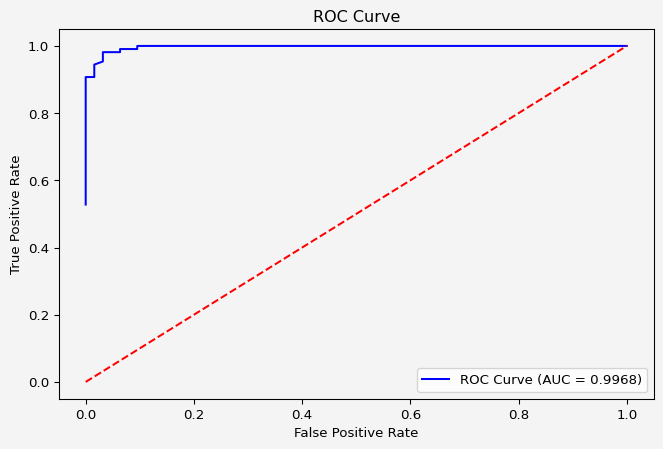

In [5]:
cutoff_values = np.arange(0,0.99,0.001)
true_pos_rates = []
false_pos_rates = []

for cutoff in cutoff_values:
    prediction = 1*(clf.predict_proba(X_test)[:,1] >= cutoff)
    conf_matrix = confusion_matrix(y_test, prediction)
    tn = conf_matrix[0,0]
    fp = conf_matrix[0,1]
    fn = conf_matrix[1,0]
    tp = conf_matrix[1,1]

    true_pos_rates.append(tp/(tp+fn))
    false_pos_rates.append(fp/(fp+tn))

plt.figure(figsize=(8,5))
plt.plot(false_pos_rates, true_pos_rates, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.gca().set_facecolor('#f4f4f4')
plt.show()

Next, precision-recall score

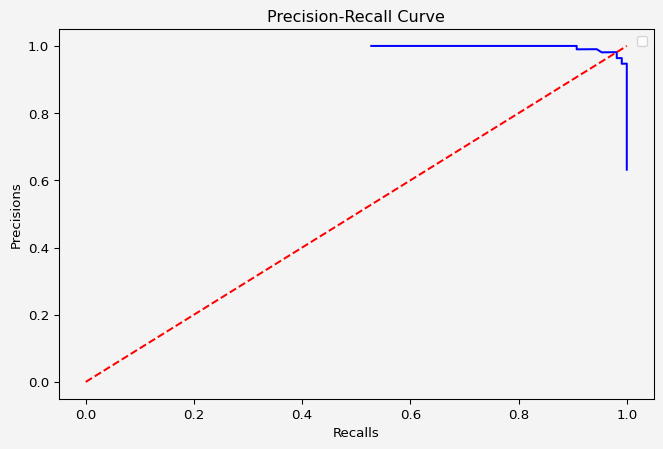

In [6]:
cutoff_values = np.arange(0,0.99,0.001)
precisions = []
recalls = []

for cutoff in cutoff_values:
    prediction = 1*(clf.predict_proba(X_test)[:,1] >= cutoff)

    precisions.append(precision_score(y_test, prediction))
    recalls.append(recall_score(y_test, prediction))

plt.figure(figsize=(8,5))
plt.plot(recalls, precisions, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Recalls')
plt.ylabel('Precisions')
plt.title('Precision-Recall Curve')
plt.legend()
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.gca().set_facecolor('#f4f4f4')
plt.show()

### Explanation of Results

1.  **Confusion Matrix**: The heatmap shows the number of true
    positives, false positives, true negatives, and false negatives,
    which gives a detailed insight into the model’s performance.

2.  **Accuracy**: This value tells us the overall correctness of the
    model. It may not always be reliable if the data is imbalanced.

3.  **Precision**: A higher precision indicates fewer false positives.
    In this dataset, it tells us how well the model identifies malignant
    tumors correctly.

4.  **Recall**: A higher recall indicates fewer false negatives. This is
    particularly important in medical settings where missing a positive
    case (malignant tumor) can be dangerous.

5.  **F1 Score**: The F1 score balances precision and recall, especially
    when the class distribution is uneven.

6.  **ROC-AUC Curve**: The ROC curve gives a visualization of the
    trade-off between sensitivity and specificity. The AUC gives a
    single number summarizing the overall ability of the model to
    distinguish between classes.

## When to Use Each Metric?

It’s important to explain when to prioritize specific metrics based on
the problem context:

-   **Accuracy**: Use when classes are balanced and misclassification
    costs are similar across classes. Avoid if the dataset is
    imbalanced.

-   **Precision**: Useful when false positives are costly. For example,
    in spam detection, it’s better to have a few missed spams than to
    mark important emails as spam.

-   **Recall**: Use when false negatives are costly. In medical
    diagnoses (e.g., cancer detection), it’s crucial to minimize missed
    positive cases (false negatives).

-   **F1 Score**: Best when you need a balance between precision and
    recall, especially with imbalanced classes.

-   **ROC-AUC**: Useful for evaluating how well your model separates the
    two classes across various thresholds. Works well when you want an
    overall measure of performance.

## Threshold Tuning and Decision Making

For classification problems, the decision threshold is crucial,
especially for metrics like ROC-AUC. Often, models use a default
threshold of 0.5 to classify whether an instance belongs to the positive
class or not, but you can adjust this threshold to prioritize recall
over precision or vice versa. You could add a section showing how
adjusting the threshold can change model performance.

Here’s an additional Python example showing how to adjust thresholds:

In [7]:
# Adjust threshold
threshold = 0.4
y_pred_thresholded = (y_pred_proba >= threshold).astype(int)

# Recompute metrics
new_precision = precision_score(y_test, y_pred_thresholded)
new_recall = recall_score(y_test, y_pred_thresholded)
new_f1 = f1_score(y_test, y_pred_thresholded)

print(f'New Precision: {new_precision:.4f}')
print(f'New Recall: {new_recall:.4f}')
print(f'New F1 Score: {new_f1:.4f}')

New Precision: 0.9554
New Recall: 0.9907
New F1 Score: 0.9727

This shows that the default threshold isn’t set in stone, and adjusting
it can significantly affect precision, recall, and other metrics.

## Class Imbalance and Its Effect on Metrics

Class imbalance can skew metrics like accuracy. A discussion on how to
handle imbalance through methods such as resampling
(oversampling/undersampling) or using techniques like SMOTE (Synthetic
Minority Over-sampling Technique) could provide further depth.

For example:

In [8]:
from imblearn.over_sampling import SMOTE

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Retrain the model on resampled data
clf_resampled = RandomForestClassifier(random_state=42)
clf_resampled.fit(X_resampled, y_resampled)

# Predictions and metrics
y_pred_resampled = clf_resampled.predict(X_test)
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
precision_resampled = precision_score(y_test, y_pred_resampled)
recall_resampled = recall_score(y_test, y_pred_resampled)

print(f'Resampled Accuracy: {accuracy_resampled:.4f}')
print(f'Resampled Precision: {precision_resampled:.4f}')
print(f'Resampled Recall: {recall_resampled:.4f}')

Resampled Accuracy: 0.9708
Resampled Precision: 0.9813
Resampled Recall: 0.9722

This demonstrates the effect of handling class imbalance on model
performance.

## Precision-Recall Curve

While the ROC curve is useful, the **Precision-Recall (PR) curve** is
often more informative when dealing with imbalanced datasets because it
focuses on the performance of the positive class. Including a section on
this can enhance the evaluation process.

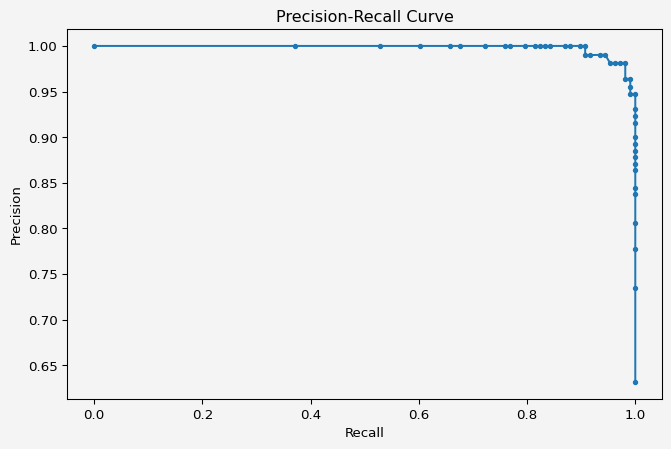

In [9]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 5))
plt.plot(recall_vals, precision_vals, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.gca().set_facecolor('#f4f4f4')
plt.show()

The PR curve shows how precision and recall change with different
classification thresholds.

## Kappa Score and Matthews Correlation Coefficient (MCC)

-   **Cohen’s Kappa** measures agreement between observed accuracy and
    expected accuracy.

-   **Matthews Correlation Coefficient (MCC)** provides a balanced
    metric even when classes are imbalanced. It considers true and false
    positives and negatives, giving a correlation-like score between
    predictions and actuals.

In [10]:
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef

kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print(f'Cohen\'s Kappa: {kappa:.4f}')
print(f'MCC: {mcc:.4f}')

Cohen's Kappa: 0.9365
MCC: 0.9372

## References

-   <a href="https://scikit-learn.org/stable/user_guide.html"
    target="_blank" style="text-decoration:none">Scikit-learn
    Documentation</a>
-   <a href="https://sebastianraschka.com/faq/docs/roc-vs-pr.html"
    target="_blank" style="text-decoration:none">Precision-Recall vs ROC
    Curves article by <em>Sebastian Raschka</em></a>  
-   <a
    href="https://towardsdatascience.com/f1-score-what-is-it-and-how-to-use-it-444b04d9aad8"
    target="_blank" style="text-decoration:none">F1 Score Explained
    <em>towardsdatascience.com</em> blog post</a>

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/posts/classificationmetrics/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/posts/classificationmetrics/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/posts/classificationmetrics/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

------------------------------------------------------------------------

**You may also like**